In [1]:
from evaluations import *

Loading pyMOR version 0.4.2-116-gadb475af


In [2]:
p = helmholtz(boundary = 'robin', g= -5j, f = False)

In [151]:
d,data = discretize_elliptic_cg(p, diameter = 1./2)

In [152]:
k = 10
cglob = -1j*k
cloc = -1j*k
mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}

In [153]:
u = d.solve(mus)

In [164]:
g = data["grid"]
bi = data["boundary_info"]
RI = bi.robin_boundaries(1)
robin_elements = g.superentities(1, 0)[RI, 0]
robin_indices = g.superentity_indices(1, 0)[RI, 0]
normals = g.unit_outer_normals()[robin_elements, robin_indices]
RE = g.subentities(0, g.dim)[robin_elements]

In [155]:
SF_GRAD = np.array(([-1., -1.], [1., 0.], [0., 1.]))
SF_GRADS = np.einsum('eij,pj->epi', g.jacobian_inverse_transposed(0), SF_GRAD)
grads = SF_GRADS[robin_elements]
coeff = u.data[0].T
lhs = - np.einsum('ij, ijl, il -> i', coeff[RE], grads, normals)

In [156]:
RE = g.subentities(1,2)[RI]
robin_c = np.mean(p.robin_data[0](g.centers(1), mu=mus)[RE], axis = 1)
robin_g = np.mean(p.robin_data[1](g.centers(1), mu=mus)[RE], axis = 1)
coeff_center = np.mean(coeff[RE],axis = 1)
rhs = robin_c*(coeff_center-robin_g)

In [157]:
dif = lhs-rhs
print np.linalg.norm(dif)/np.linalg.norm(lhs)

16.3044277879


In [168]:
print bi.robin_boundaries(1)
print g.subentities(1,2)[RI]
print RE
p.robin_data[0](g.centers(1), mu=mus).shape
robin_edges = bi.robin_boundaries(1)
g.subentities(1,2)[robin_edges]

[ 0  2  3  5  6  7 10 11]
[[3 0]
 [2 5]
 [6 3]
 [5 8]
 [0 1]
 [1 2]
 [7 6]
 [8 7]]
[[ 9  3  0]
 [10  2  5]
 [11  6  3]
 [12  5  8]
 [ 9  0  1]
 [10  1  2]
 [11  7  6]
 [12  8  7]]


array([[3, 0],
       [2, 5],
       [6, 3],
       [5, 8],
       [0, 1],
       [1, 2],
       [7, 6],
       [8, 7]], dtype=int32)

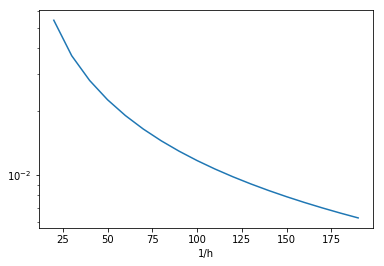

In [169]:
from evaluations import *

err = []
rang = range(20,200,10)
for i in rang:
	p = helmholtz(boundary = 'robin', g= -5j, f = False)
	d,data = discretize_elliptic_cg(p, diameter = 1./i)
	k = 10
	cglob = -1j*k
	cloc = -1j*k
	mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
	u = d.solve(mus)
	g = data["grid"]
	bi = data["boundary_info"]
	robin_edges = bi.robin_boundaries(1)
	robin_elements = g.superentities(1, 0)[robin_edges, 0]
	robin_indices = g.superentity_indices(1, 0)[robin_edges, 0]
	normals = g.unit_outer_normals()[robin_elements, robin_indices]
	SF_GRAD = np.array(([-1., -1.], [1., 0.], [0., 1.]))
	SF_GRADS = np.einsum('eij,pj->epi', g.jacobian_inverse_transposed(0), SF_GRAD)
	grads = SF_GRADS[robin_elements]
	coeff = u.data[0].T
	robin_elements_viavertex = g.subentities(0, 2)[robin_elements]
	lhs = - np.einsum('ij, ijl, il -> i', coeff[robin_elements_viavertex], grads, normals)
	robin_c = p.robin_data[0](g.centers(1), mu=mus)[robin_edges]
	robin_g = p.robin_data[1](g.centers(1), mu=mus)[robin_edges]
	robin_edges_viavertex = g.subentities(1,2)[robin_edges]
	coeff_center = np.mean(coeff[robin_edges_viavertex],axis = 1)
	rhs = robin_c*(coeff_center-robin_g)
	dif = lhs-rhs
	err.append(np.linalg.norm(dif)/np.linalg.norm(lhs))

from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(rang, err)
plt.xlabel('1/h')
plt.legend(loc='upper right')
plt.show()

In [148]:
print err

[0.054186501239962097, 0.036777090257965134, 0.028067898568781606, 0.022737407443918025, 0.019120406289013143, 0.016500446196946628, 0.014513719344026168, 0.012954837562243764, 0.011698785078299008, 0.010665015299869927, 0.0097992585154036919, 0.0090636002268367679, 0.0084307452137344103, 0.0078805398527365799, 0.0073977782418913306, 0.0069707708077584741, 0.0065903829436067436, 0.006249372850076775]


NameError: name 'robin_edges_viavertex' is not defined

In [15]:
from evaluations import *

err = []
p = helmholtz(boundary = 'robin', g= -5j, f = False)
d,data = discretize_elliptic_cg(p, diameter = 1./100)
k = 10
cglob = -1j*k
cloc = -1j*k
mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
u = d.solve(mus)
g = data["grid"]
bi = data["boundary_info"]
robin_edges = bi.robin_boundaries(1)
robin_elements = g.superentities(1, 0)[robin_edges, 0]
robin_indices = g.superentity_indices(1, 0)[robin_edges, 0]
normals = g.unit_outer_normals()[robin_elements, robin_indices]
SF_GRAD = np.array(([-1., -1.], [1., 0.], [0., 1.]))
SF_GRADS = np.einsum('eij,pj->epi', g.jacobian_inverse_transposed(0), SF_GRAD)
grads = SF_GRADS[robin_elements]
coeff = u.data[0].T
robin_elements_viavertex = g.subentities(0, 2)[robin_elements]
lhs = - np.einsum('ij, ijl, il -> i', coeff[robin_elements_viavertex], grads, normals)
robin_c = p.robin_data[0](g.centers(1), mu=mus)[robin_edges]
robin_g = p.robin_data[1](g.centers(1), mu=mus)[robin_edges]
robin_edges_viavertex = g.subentities(1,2)[robin_edges]
coeff_center = np.mean(coeff[robin_edges_viavertex],axis = 1)
rhs = robin_c*(coeff_center-robin_g)
dif = lhs-rhs
print np.linalg.norm(dif)/np.linalg.norm(lhs)

0.0116987850783


In [172]:
robin_elements_viavertex

array([[ 9,  3,  0],
       [10,  2,  5],
       [11,  6,  3],
       [12,  5,  8],
       [ 9,  0,  1],
       [10,  1,  2],
       [11,  7,  6],
       [12,  8,  7]], dtype=int32)

In [173]:
coeff[robin_elements_viavertex]

array([[ 2.81224334-3.10870462j,  2.61893618-2.61830197j,
         2.35076169-2.88593486j],
       [ 2.81224334-3.10870462j,  2.35076169-2.88593486j,
         2.61893618-2.61830197j],
       [ 2.81224334-3.10870462j,  2.35076169-2.88593486j,
         2.61893618-2.61830197j],
       [ 2.81224334-3.10870462j,  2.61893618-2.61830197j,
         2.35076169-2.88593486j],
       [ 2.81224334-3.10870462j,  2.35076169-2.88593486j,
         2.61893618-2.61830197j],
       [ 2.81224334-3.10870462j,  2.61893618-2.61830197j,
         2.35076169-2.88593486j],
       [ 2.81224334-3.10870462j,  2.61893618-2.61830197j,
         2.35076169-2.88593486j],
       [ 2.81224334-3.10870462j,  2.35076169-2.88593486j,
         2.61893618-2.61830197j]])

In [175]:
coeff[3]

(2.6189361806226161-2.6183019715605584j)

In [146]:
from evaluations import *

err = []
p = helmholtz(boundary = 'robin', g= -5j, f = False)
d,data = discretize_elliptic_cg(p, diameter = 1./2)
k = 10
cglob = -1j*k
cloc = -1j*k
mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
u = d.solve(mus)
g = data["grid"]
bi = data["boundary_info"]
robin_edges = bi.robin_boundaries(1)
robin_vertices = bi.robin_boundaries(2)
robin_elements = g.superentities(1, 0)[robin_edges, 0]
robin_indices = g.superentity_indices(1, 0)[robin_edges, 0]
normals = g.unit_outer_normals()[robin_elements, robin_indices]
SF_GRAD = np.array(([-1., -1.], [1., 0.], [0., 1.]))
SF_GRADS = np.einsum('eij,pj->epi', g.jacobian_inverse_transposed(0), SF_GRAD)
grads = SF_GRADS[robin_elements]
coeff = u.data[0].T
robin_elements_viavertex = g.subentities(0, 2)[robin_elements]
lhs_perelement = - np.einsum('ij, ijl, il -> i', coeff[robin_elements_viavertex], grads, normals)
vertex_element_neighbors = np.array([robin_elements[np.where([v in el for el in robin_elements_viavertex])[0]] for v in robin_vertices])
lhs_pervertex = [np.mean(lhs_perelement[np.array([np.where(robin_elements == vertex_element_neighbors[i][j])[0][0] for j in range(len(vertex_element_neighbors[i]))])]) for i in range(len(vertex_element_neighbors))]
robin_c = p.robin_data[0](g.centers(2), mu=mus)[robin_vertices]
robin_g = p.robin_data[1](g.centers(2), mu=mus)[robin_vertices]
coeff_center = coeff[robin_vertices]
rhs = robin_c*(coeff_center-robin_g)
dif = lhs_pervertex-rhs
print np.linalg.norm(dif)/np.linalg.norm(lhs)

16.3337525147


In [134]:
print np.repeat(g.subentities(0, g.dim), g.dim + 1, axis=1).ravel()
print np.tile(g.subentities(0, g.dim), [1, g.dim + 1]).ravel()
print g.subentities(0, g.dim)
g.integration_elements(0)

[ 9  9  9  0  0  0  1  1  1 10 10 10  1  1  1  2  2  2 11 11 11  3  3  3  4
  4  4 12 12 12  4  4  4  5  5  5  9  9  9  1  1  1  4  4  4 10 10 10  2  2
  2  5  5  5 11 11 11  4  4  4  7  7  7 12 12 12  5  5  5  8  8  8  9  9  9
  4  4  4  3  3  3 10 10 10  5  5  5  4  4  4 11 11 11  7  7  7  6  6  6 12
 12 12  8  8  8  7  7  7  9  9  9  3  3  3  0  0  0 10 10 10  4  4  4  1  1
  1 11 11 11  6  6  6  3  3  3 12 12 12  7  7  7  4  4  4]
[ 9  0  1  9  0  1  9  0  1 10  1  2 10  1  2 10  1  2 11  3  4 11  3  4 11
  3  4 12  4  5 12  4  5 12  4  5  9  1  4  9  1  4  9  1  4 10  2  5 10  2
  5 10  2  5 11  4  7 11  4  7 11  4  7 12  5  8 12  5  8 12  5  8  9  4  3
  9  4  3  9  4  3 10  5  4 10  5  4 10  5  4 11  7  6 11  7  6 11  7  6 12
  8  7 12  8  7 12  8  7  9  3  0  9  3  0  9  3  0 10  4  1 10  4  1 10  4
  1 11  6  3 11  6  3 11  6  3 12  7  4 12  7  4 12  7  4]
[[ 9  0  1]
 [10  1  2]
 [11  3  4]
 [12  4  5]
 [ 9  1  4]
 [10  2  5]
 [11  4  7]
 [12  5  8]
 [ 9  4  3]
 [10  5  4]
 [

array([ 0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,
        0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125])

In [163]:
from scipy.sparse import coo_matrix
SF_INTS = np.einsum('epi,eqi,e->epq', SF_GRADS, SF_GRADS, g.volumes(0)).ravel()
SF_I0 = np.repeat(g.subentities(0, g.dim), g.dim + 1, axis=1).ravel()
SF_I1 = np.tile(g.subentities(0, g.dim), [1, g.dim + 1]).ravel()
A = coo_matrix((SF_INTS, (SF_I0, SF_I1)), shape=(g.size(g.dim), g.size(g.dim)))
print A
print A.todense()
print g.subentities(0, g.dim)
print np.einsum('epi,eqi,e->epq', SF_GRADS, SF_GRADS, g.volumes(0))

  (9, 9)	1.0
  (9, 0)	-0.5
  (9, 1)	-0.5
  (0, 9)	-0.5
  (0, 0)	0.5
  (0, 1)	0.0
  (1, 9)	-0.5
  (1, 0)	0.0
  (1, 1)	0.5
  (10, 10)	1.0
  (10, 1)	-0.5
  (10, 2)	-0.5
  (1, 10)	-0.5
  (1, 1)	0.5
  (1, 2)	0.0
  (2, 10)	-0.5
  (2, 1)	0.0
  (2, 2)	0.5
  (11, 11)	1.0
  (11, 3)	-0.5
  (11, 4)	-0.5
  (3, 11)	-0.5
  (3, 3)	0.5
  (3, 4)	0.0
  (4, 11)	-0.5
  :	:
  (10, 1)	-0.5
  (4, 10)	-0.5
  (4, 4)	0.5
  (4, 1)	0.0
  (1, 10)	-0.5
  (1, 4)	0.0
  (1, 1)	0.5
  (11, 11)	1.0
  (11, 6)	-0.5
  (11, 3)	-0.5
  (6, 11)	-0.5
  (6, 6)	0.5
  (6, 3)	0.0
  (3, 11)	-0.5
  (3, 6)	0.0
  (3, 3)	0.5
  (12, 12)	1.0
  (12, 7)	-0.5
  (12, 4)	-0.5
  (7, 12)	-0.5
  (7, 7)	0.5
  (7, 4)	0.0
  (4, 12)	-0.5
  (4, 7)	0.0
  (4, 4)	0.5
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  

In [168]:
A.shape
g.subentities(1,2)

array([[ 3,  0],
       [ 1,  4],
       [ 2,  5],
       [ 6,  3],
       [ 4,  7],
       [ 5,  8],
       [ 0,  1],
       [ 1,  2],
       [ 3,  4],
       [ 4,  5],
       [ 7,  6],
       [ 8,  7],
       [ 9,  0],
       [10,  1],
       [11,  3],
       [12,  4],
       [ 4,  9],
       [ 5, 10],
       [ 7, 11],
       [ 8, 12],
       [ 3,  9],
       [ 4, 10],
       [ 6, 11],
       [ 7, 12],
       [ 1,  9],
       [ 2, 10],
       [ 4, 11],
       [ 5, 12]], dtype=int32)

In [162]:
np.einsum('epi,eqi,e->epq', SF_GRADS, SF_GRADS, g.volumes(0))

array([[[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ],
        [-0.5,  0. ,  0.5]],

       [[ 1. , -0.5, -0.5],
        [-0.5,  0.5,  0. ]

In [91]:
lhs_perelement = - np.einsum('ij, ijl, il -> i', coeff[robin_elements_viavertex], grads, normals)
vertex_element_neighbors = np.array([robin_elements[np.where([v in el for el in robin_elements_viavertex])[0]] for v in robin_vertices])
#lhs_pervertex = lhs_perelement[vertex_element_neighbors]

In [94]:
vertex_element_neighbors

array([[12,  0],
       [ 0,  1],
       [ 5,  1],
       [12, 14],
       [ 5,  7],
       [14, 10],
       [10, 11],
       [ 7, 11]], dtype=int32)

In [54]:
robin_elements

array([12,  5, 14,  7,  0,  1, 10, 11], dtype=int32)

In [95]:
lhs_perelement[robin_elements]

IndexError: index 12 is out of bounds for axis 0 with size 8

In [96]:
robin_vertices = bi.robin_boundaries(2)
robin_vertices

array([0, 1, 2, 3, 5, 6, 7, 8], dtype=int32)

In [ ]:
for v in robin_vertices:
    

In [99]:
i=0
v = robin_vertices[i]
neighbors = vertex_element_neighbors[i]
neighbors

array([12,  0], dtype=int32)

In [117]:
indices = np.array([np.where(robin_elements == vertex_element_neighbors[i][j])[0][0] for j in range(len(vertex_element_neighbors[i]))])
lhs_pervertex = [np.mean(lhs_perelement[np.array([np.where(robin_elements == vertex_element_neighbors[i][j])[0][0] for j in range(len(vertex_element_neighbors[i]))])]) for i in range(len(vertex_element_neighbors))]

[(1.3095776323937831-1.4263448309742874j),
 (1.3095776323937667-1.426344830974283j),
 (1.3095776323937529-1.4263448309742843j),
 (1.3095776323937898-1.4263448309742919j),
 (1.309577632393776-1.4263448309742901j),
 (1.3095776323937942-1.4263448309742932j),
 (1.3095776323937982-1.4263448309742972j),
 (1.3095776323938004-1.4263448309742972j)]

In [116]:
len(vertex_element_neighbors)

8

In [136]:
SF_GRADS.shape

(16, 3, 2)

In [138]:
SF_INTS = np.einsum('epi,eqi,e->epq', SF_GRADS, SF_GRADS, g.volumes(0))
SF_INTS.shape

(16, 3, 3)

In [140]:
g.volumes(0)

array([ 0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625])

In [271]:
result = np.zeros((len(RE),2), dtype=complex)
for i in range(len(RE)):
    dreieck = RE[i]
    grad = grads[i]
    result[i] = grad[0]*coeff[dreieck[0]]+ grad[1]*coeff[dreieck[1]]+ grad[2]*coeff[dreieck[2]]
print result
a = np.einsum('ij, ijl -> il', coeff[RE], grads)
print a

[[  6.87280873e+00 -9.33278322e+00j  -6.15895287e-01 -4.12631137e-01j]
 [ -6.87280873e+00 +9.33278322e+00j  -6.15895287e-01 -4.12631137e-01j]
 [ -1.07759766e+01 +1.47134685e+01j  -2.66453526e-15 +0.00000000e+00j]
 [  1.07759766e+01 -1.47134685e+01j   0.00000000e+00 +1.77635684e-15j]
 [  6.87280873e+00 -9.33278322e+00j   6.15895287e-01 +4.12631137e-01j]
 [ -6.87280873e+00 +9.33278322e+00j   6.15895287e-01 +4.12631137e-01j]
 [ -6.15895287e-01 -4.12631137e-01j   6.87280873e+00 -9.33278322e+00j]
 [ -4.44089210e-15 +7.10542736e-15j  -1.07759766e+01 +1.47134685e+01j]
 [  6.15895287e-01 +4.12631137e-01j   6.87280873e+00 -9.33278322e+00j]
 [ -6.15895287e-01 -4.12631137e-01j  -6.87280873e+00 +9.33278322e+00j]
 [  7.99360578e-15 -3.55271368e-15j   1.07759766e+01 -1.47134685e+01j]
 [  6.15895287e-01 +4.12631137e-01j  -6.87280873e+00 +9.33278322e+00j]]
[[  6.87280873e+00 -9.33278322e+00j  -6.15895287e-01 -4.12631137e-01j]
 [ -6.87280873e+00 +9.33278322e+00j  -6.15895287e-01 -4.12631137e-01j]
 [ -1

In [ ]:
print result

In [272]:
normalgrad = -np.einsum('ij, ij -> i', result, normals)
print normalgrad


[  6.87280873 -9.33278322j   6.87280873 -9.33278322j
 -10.77597656+14.71346855j -10.77597656+14.71346855j
   6.87280873 -9.33278322j   6.87280873 -9.33278322j
   6.87280873 -9.33278322j -10.77597656+14.71346855j
   6.87280873 -9.33278322j   6.87280873 -9.33278322j
 -10.77597656+14.71346855j   6.87280873 -9.33278322j]
[  6.87280873 -9.33278322j   6.87280873 -9.33278322j
 -10.77597656+14.71346855j -10.77597656+14.71346855j
   6.87280873 -9.33278322j   6.87280873 -9.33278322j
   6.87280873 -9.33278322j -10.77597656+14.71346855j
   6.87280873 -9.33278322j   6.87280873 -9.33278322j
 -10.77597656+14.71346855j   6.87280873 -9.33278322j]


In [212]:
robin_c = p.robin_data[0](g.centers(1), mu=mus)[RI]
robin_g = p.robin_data[1](g.centers(1), mu=mus)


x = u.data[0][0]
x = 1
-10j*(x+5j)
print u.data[0][16]

y = normalgrad[0]/(-10j)-5j
print y

[ 2.53260651-3.11798052j  2.32730809-3.25552423j  2.32730809-3.25552423j
  2.53260651-3.11798052j  2.32730809-3.25552423j -1.93723093+2.66577474j
 -1.93723093+2.66577474j  2.32730809-3.25552423j  2.32730809-3.25552423j
 -1.93723093+2.66577474j -1.93723093+2.66577474j  2.32730809-3.25552423j
  2.53260651-3.11798052j  2.32730809-3.25552423j  2.32730809-3.25552423j
  2.53260651-3.11798052j  3.57542542-4.74221624j  0.53131199-0.80327947j
  3.57542542-4.74221624j  0.53131199-0.80327947j -5.27728425+7.2619381j
  0.53131199-0.80327947j  3.57542542-4.74221624j  0.53131199-0.80327947j
  3.57542542-4.74221624j]
[ 0.93327832-4.31271913j  0.93327832-4.31271913j -1.47134685-6.07759766j
 -1.47134685-6.07759766j  0.93327832-4.31271913j  0.93327832-4.31271913j
  0.93327832-4.31271913j -1.47134685-6.07759766j  0.93327832-4.31271913j
  0.93327832-4.31271913j -1.47134685-6.07759766j  0.93327832-4.31271913j]


In [63]:
rhs = (u_rob-robin_g)*robin_c

In [64]:
print grads.shape
print normals.shape
print u_rob.shape
print  robin_elements
print robin_indices

(12, 3, 2)
(12, 2)
(12, 1)
[27 11 30 14 33 17  0  1  2 24 25 26]
[0 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
RE = g.subentities(0, g.dim)[robin_elements]
print RE

[[16  4  0]
 [18  3  7]
 [19  8  4]
 [21  7 11]
 [22 12  8]
 [24 11 15]
 [16  0  1]
 [17  1  2]
 [18  2  3]
 [22 13 12]
 [23 14 13]
 [24 15 14]]


In [ ]:
for i in SE:
    grad = udat[i[0]]*grads[]

In [13]:
from pymor.grids.referenceelements import line
q, w = line.quadrature(order=2)
SF = np.squeeze(np.array([1 - q, q]))
SF_INTS = np.einsum('ep,pi,pj,e,p->eij', u_rob, SF, SF, g.integration_elements(1)[RI], w)
normal_INTS = np.einsum('ei,eqi->eq', normals, SF_INTS)
normal_INTS

array([[ 0.02708092 +5.65805231e-02j,  0.01354046 +2.82902616e-02j],
       [-0.02708092 -5.65805231e-02j, -0.01354046 -2.82902616e-02j],
       [ 0.01205108 +4.09560924e-02j,  0.00602554 +2.04780462e-02j],
       [-0.01205108 -4.09560924e-02j, -0.00602554 -2.04780462e-02j],
       [-0.00080891 +2.18924039e-02j, -0.00040445 +1.09462019e-02j],
       [ 0.00080891 -2.18924039e-02j,  0.00040445 -1.09462019e-02j],
       [-0.00903893 +4.35655877e-03j, -0.00451946 +2.17827939e-03j],
       [ 0.00903893 -4.35655877e-03j,  0.00451946 -2.17827939e-03j],
       [-0.01179775 -8.03332842e-03j, -0.00589888 -4.01666421e-03j],
       [ 0.01179775 +8.03332842e-03j,  0.00589888 +4.01666421e-03j],
       [-0.00958732 -1.35667510e-02j, -0.00479366 -6.78337549e-03j],
       [ 0.00958732 +1.35667510e-02j,  0.00479366 +6.78337549e-03j],
       [-0.00382842 -1.25719560e-02j, -0.00191421 -6.28597798e-03j],
       [ 0.00382842 +1.25719560e-02j,  0.00191421 +6.28597798e-03j],
       [ 0.00357046 -7.04382983e-0

In [ ]:
d.visualize(u)

In [75]:
f = d.rhs.assemble(mus)._matrix
print f

[[-2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5
  -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5  0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -2.5 -2.5  0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  -2.5 -2.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  -2.5 -2.5  0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  -2.5 -2.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  -2.5 -2.5  0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -2.5 -2.5  0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  -2.5 -2.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  -2.5 -2.5  0.   0.   0.   0.
   0.   0.   0. 

In [76]:
a = d.operator.assemble(mus)._matrix.todense().dot(u.data.T)
print a

[[ -2.50000000e+00 +4.44089210e-16j]
 [ -2.50000000e+00 +0.00000000e+00j]
 [ -2.50000000e+00 -1.11022302e-16j]
 [ -2.50000000e+00 +2.63677968e-16j]
 [ -2.50000000e+00 +1.11022302e-16j]
 [ -2.50000000e+00 +1.11022302e-16j]
 [ -2.50000000e+00 -7.77156117e-16j]
 [ -2.50000000e+00 +7.21644966e-16j]
 [ -2.50000000e+00 +6.93889390e-18j]
 [ -2.50000000e+00 +0.00000000e+00j]
 [ -2.50000000e+00 +1.11022302e-16j]
 [ -2.50000000e+00 -1.11022302e-16j]
 [ -2.50000000e+00 -1.11022302e-16j]
 [ -2.50000000e+00 -3.33066907e-16j]
 [ -2.50000000e+00 -5.55111512e-16j]
 [ -2.50000000e+00 +1.11022302e-16j]
 [ -2.50000000e+00 +2.08166817e-17j]
 [ -2.50000000e+00 -2.22044605e-16j]
 [ -2.50000000e+00 +0.00000000e+00j]
 [ -2.50000000e+00 +1.77635684e-15j]
 [ -2.50000000e+00 -4.44089210e-16j]
 [ -2.50000000e+00 -2.22044605e-16j]
 [ -4.44089210e-16 -1.33226763e-15j]
 [ -4.44089210e-16 +5.55111512e-16j]
 [  2.66453526e-15 +6.24500451e-16j]
 [  3.55271368e-15 +4.99600361e-16j]
 [  2.66453526e-15 +8.88178420e-16j]
 

In [77]:
np.linalg.norm(a.imag)

2.1397379722883773e-14

In [79]:
np.where(np.abs(a.imag) >1e-14)

(array([], dtype=int64), array([], dtype=int64))

In [80]:
b = a.real

In [81]:
b[np.where(np.abs(b)<1e-14)]=0

In [82]:
b = np.array(b).T

In [83]:
b

array([[ -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,  -2.50000000e+00,  -2.50000000e+00,
         -2.50000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -2.50000000e+00,
         -2.50000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [86]:
np.where(np.abs(f-b) >1e-13)

(array([], dtype=int64), array([], dtype=int64))

In [92]:
F = VectorFunctional(NumpyVectorArray(np.array(d.operator.assemble(mus)._matrix.todense().dot(u.data.T).real).T))

In [93]:
dis = StationaryDiscretization(d.operator, F)

In [100]:
ur = dis.solve(mus)

In [101]:
d.visualize(u-ur)

/home/root_dennis/pymor_MA/src/pymor/gui/qt.py:281: ComplexWarning: Casting complex values to real discards the imaginary part
  U = (U.data.astype(np.float64, copy=False),) if hasattr(U, 'data') else \


In [105]:
d.operator.apply(u,mu = mus).real

NumpyVectorArray([[ -2.50000000e+00  -2.50000000e+00  -2.50000000e+00  -2.50000000e+00
   -2.50000000e+00  -2.50000000e+00  -2.50000000e+00  -2.50000000e+00
   -2.50000000e+00  -2.50000000e+00  -2.50000000e+00  -2.50000000e+00
   -2.50000000e+00  -2.50000000e+00  -2.50000000e+00  -2.50000000e+00
   -2.50000000e+00  -2.50000000e+00  -2.50000000e+00  -2.50000000e+00
   -2.50000000e+00  -2.50000000e+00  -1.38777878e-17  -8.32667268e-16
   -7.77156117e-16   3.88578059e-15   2.22044605e-15   5.55111512e-17
    0.00000000e+00   2.77555756e-16  -9.15933995e-16  -7.77156117e-16
    9.43689571e-16   3.10862447e-15  -1.99840144e-15  -3.21964677e-15
    3.44169138e-15   1.77635684e-15  -3.33066907e-16   1.05471187e-15
    1.38777878e-17  -2.50000000e+00  -2.50000000e+00  -2.33146835e-15
    2.55351296e-15   1.77635684e-15  -5.55111512e-16  -2.22044605e-15
    6.66133815e-16  -5.32907052e-15   1.66533454e-15   2.88657986e-15
    2.49800181e-15   0.00000000e+00   9.99200722e-16   4.55191440e-15
   

In [106]:
norm = induced_norm(d.operator)

In [111]:
d.operator.apply2(u,u, mu = mus)

AssertionError: 

In [120]:
k=1
coarse_grid_resolution=10
resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
n = int(k/5+30)
test1(k=1, n=n, resolution = resolution)

localizing problem
creating bases
reconstructing solution
1.78238326027e-07
